### this notebook presents how the NumpyNN module may be used

In [2]:
%load_ext autoreload
%autoreload 2
import sys
import matplotlib.pyplot as plt

sys.path.append("Package")
import numpy as np

from NumpyNN import blocks, functional, data, optimizers, metrics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
DATA_PATH = "Iris.csv" # Do not use magic values always create some constant variable
TARGET_NAME = "Species"
NUM_VARIABLES = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
dataset = data.Dataset(DATA_PATH, TARGET_NAME, [], NUM_VARIABLES, pipeline_numerical=[functional.normalize])

loader = data.DataLoader(dataset)

In [4]:
num_of_arguments = 4
hidden_size = 30
num_of_classes = 3
LEARNING_RATE = 1e-2

layer = blocks.layers.LinearLayer(num_of_arguments, hidden_size)
relu = blocks.layers.ReLU()
layer2 = blocks.layers.LinearLayer(hidden_size, num_of_classes)
cross_entropy = blocks.losses.CrossEntropyLoss()

net = blocks.Network(cross_entropy, layer, relu, layer2)
optimizer = optimizers.SGD(net, LEARNING_RATE)



In [5]:
def train_one_batch(dataloader : data.DataLoader, network: blocks.Network, optimizer : optimizers.Optimizer):
    loss = []
    for X, targets in dataloader.get_data():
        loss.append(network.forward_loss(X, targets))

        network.backward()
        
        optimizer.update_weights()

        optimizer.zero_grad()

    return sum(loss) / len(loss)

In [6]:
def inference(X, network: blocks.Network):
    logits = network.forward(X)
    probabilities = functional.softmax(logits)
    predictions = np.argmax(probabilities, axis=1)

    return predictions


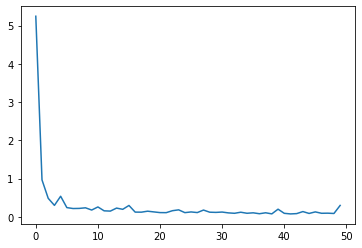

In [7]:
EPOCHS = 50
losses = []
for epoch in range(EPOCHS):
    losses.append(train_one_batch(loader, net, optimizer))

plt.plot(losses)

In [8]:
accuracy = metrics.accuracy_multiclass(net, dataset.dataset, dataset.target)
print(f"accuracy: {accuracy * 100:.2f}%")

accuracy: 96.67%
